Import of libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from math import log, exp
from sklearn import preprocessing, cluster
import seaborn
from sklearn.decomposition import PCA
import matplotlib as mpl
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

Loading csv-file with data by addresses

In [2]:
addresses_analysis = pd.read_csv('addresses_analysis.csv')

Filtering data by wallets (without contracts) and calculating 4 fields

In [3]:
data = addresses_analysis[addresses_analysis['is_contract']==False][['count_from',
       'count_value_non_zero_from', 'max_value_from', 'mean_value_from',
       'sum_value_from', 'max_gas_from', 'sum_gas_from', 'min_gas_from',
       'mean_gas_from', 'max_gasPrice_from',
       'count_non_zero_gasPrise_from', 'sum_gasPrice_from',
       'mean_gasPrice_from', 'min_gasPrice_from', 
       'count_to', 'count_value_non_zero_to',
       'max_value_to', 'mean_value_to', 'sum_value_to', 'max_gas_to',
       'sum_gas_to', 'min_gas_to', 'mean_gas_to', 
       'max_gasPrice_to', 'sum_gasPrice_to',
       'mean_gasPrice_to', 'min_gasPrice_to']]
data.loc[:,'count_value_zero_from'] = data['count_from'] - data['count_value_non_zero_from']
data.loc[:,'count_value_zero_to'] = data['count_to'] - data['count_value_non_zero_to']
data.loc[:, 'percent_count_value_zero_from'] = data['count_value_zero_from']/data['count_from']
data.loc[:, 'percent_count_value_zero_to'] = data['count_value_zero_to']/data['count_to']
data.fillna(0,  inplace=True)
data = data.drop(['count_value_non_zero_from', 'count_value_non_zero_to'], axis=1)

Some intresting data description

In [4]:
data.describe()

# data.columns

# data[(data['count_from']<=15) 
#      & (data['count_to']<=15) 
#      & ((data['sum_value_from']>=333) | (data['sum_value_to']>=333))].describe()

# data[(data['count_from']<=15) 
#      & (data['count_to']<=15)].describe()

# data[(data['count_value_zero_from']<=1) 
#      & (data['count_value_zero_to']==0)].describe()

# data[data['count_value_zero_from']>0].describe()

# addresses_to_analysis.describe()

# addresses_to_analysis[addresses_to_analysis['count_from']>=50000][['address','is_contract', 'count_from']]

,count_from,max_value_from,mean_value_from,sum_value_from,max_gas_from,sum_gas_from,min_gas_from,mean_gas_from,max_gasPrice_from,count_non_zero_gasPrise_from,...,min_gas_to,mean_gas_to,max_gasPrice_to,sum_gasPrice_to,mean_gasPrice_to,min_gasPrice_to,count_value_zero_from,count_value_zero_to,percent_count_value_zero_from,percent_count_value_zero_to
count,938179.000000,938179.000000,938179.000000,9.381790e+05,9.381790e+05,9.381790e+05,9.381790e+05,9.381790e+05,9.381790e+05,938179.000000,...,9.381790e+05,9.381790e+05,9.381790e+05,9.381790e+05,9.381790e+05,9.381790e+05,938179.000000,938179.000000,938179.000000,938179.000000
mean,6.818968,337.523847,142.763860,4.932842e+02,9.548456e+04,8.776413e+05,5.330836e+04,6.832453e+04,2.979146e+10,6.818968,...,5.741180e+04,6.182371e+04,2.771796e+10,9.244928e+10,2.589096e+10,2.456224e+10,1.674435,0.006632,0.121987,0.000131
std,789.922353,1006.124510,448.632919,7.595915e+03,2.262316e+05,8.840114e+07,9.754639e+04,1.182467e+05,2.087869e+12,789.922353,...,9.595865e+04,9.994814e+04,2.352758e+11,3.637090e+12,2.342607e+11,2.341083e+11,201.556584,4.110995,0.303186,0.008723
min,1.000000,0.000000,0.000000,0.000000e+00,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,1.000000e+00,1.000000,...,2.100000e+04,2.100000e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.233996,0.197000,3.459763e-01,2.100000e+04,2.200000e+04,2.100000e+04,2.100000e+04,2.000000e+10,1.000000,...,2.100000e+04,2.100000e+04,2.000000e+10,2.100000e+10,2.000000e+10,2.000000e+10,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.999685,1.334536,2.883376e+00,9.000000e+04,1.000000e+05,2.100000e+04,4.400000e+04,2.100000e+10,2.000000,...,2.100100e+04,2.520100e+04,2.100000e+10,4.000000e+10,2.100000e+10,2.100000e+10,0.000000,0.000000,0.000000,0.000000
75%,3.000000,33.030659,23.772272,5.175216e+01,9.000000e+04,1.530000e+05,8.000000e+04,9.000000e+04,2.360746e+10,3.000000,...,9.000000e+04,9.000000e+04,2.500000e+10,5.544000e+10,2.310000e+10,2.200000e+10,0.000000,0.000000,0.000000,0.000000
max,472284.000000,485705.459750,164475.658972,4.165314e+06,6.758383e+06,4.250556e+10,6.719771e+06,6.719771e+06,2.000000e+15,472284.000000,...,4.048262e+06,4.048262e+06,2.000000e+14,1.938234e+15,2.000000e+14,2.000000e+14,159259.000000,3612.000000,1.000000,1.000000


Histogram of addresses in terms of turnover txn(sum of value txn)

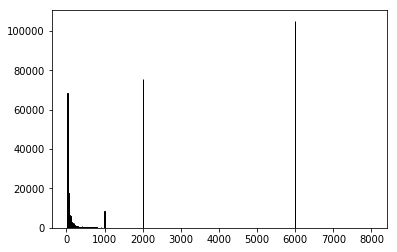

In [5]:
plt.hist(data['sum_value_from']+data['sum_value_to'],range=(15.0, 8000.0), bins=500, fc='k', ec='k')
mpl.rcParams['figure.figsize'] = (20.0, 7.0)
plt.show()

Bar diagramm of addresses by turnover "from" txn (value sum "from") for 'count_from' and 'count_to' <= 15

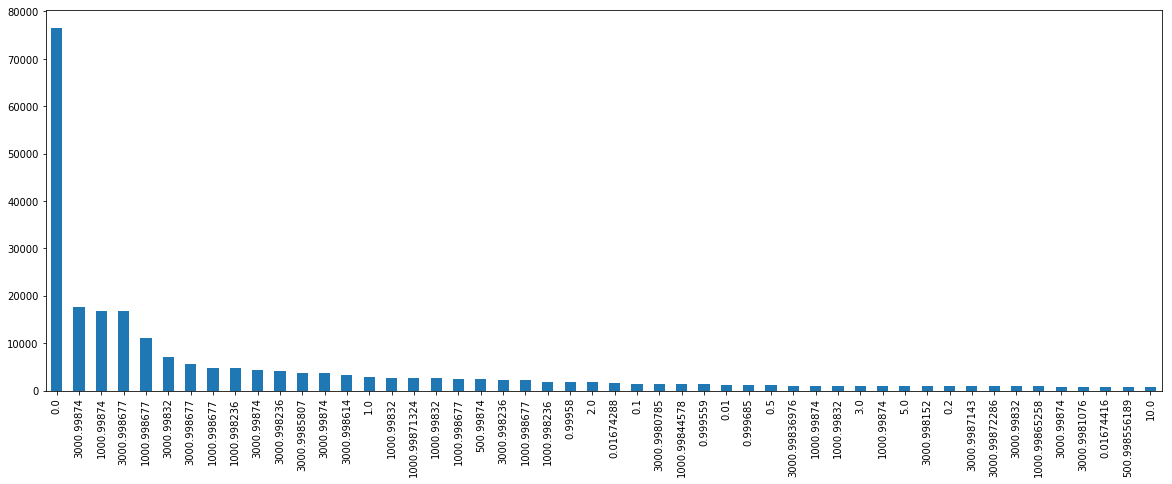

In [6]:
data[(data['count_from']<=15) & (data['count_to']<=15)]['sum_value_from'].value_counts()[:10].plot(kind='bar')
mpl.rcParams['figure.figsize'] = (20.0, 7.0)
plt.show()

Intresting data

In [7]:
print ('Count of addresses sum_value_to between 3000 and 3100:   ', 
       len(data[(data['sum_value_to']>=3000) & (data['sum_value_to']<=3100)]))

print ('Count of addresses sum_value_from between 3000 and 3100: ', 
       len(data[(data['sum_value_from']>=3000) & (data['sum_value_from']<=3100)]))

print ('Count of addresses sum_value_to between 1000 and 1100:   ', 
       len(data[(data['sum_value_to']>=1000) & (data['sum_value_to']<=1100)]))

print ('Count of addresses sum_value_from between 1000 and 1100: ', 
       len(data[(data['sum_value_from']>=1000) & (data['sum_value_from']<=1100)]))

Count of addresses sum_value_to between 3000 and 3100:    105355
Count of addresses sum_value_from between 3000 and 3100:  105346
Count of addresses sum_value_to between 1000 and 1100:    76176
Count of addresses sum_value_from between 1000 and 1100:  76113


Logarithmic, filtered and standardized data

In [8]:
data_log = pd.DataFrame(columns=data.columns)
for i in data.columns:
    data_log.loc[:,i] = data[i].map(lambda x: -10 if x <=0 else log(x))

data_X = data_log[['count_from', 
      'sum_value_from', 'count_to',
       'sum_value_to']]
X = np.array(data_X)
scaler = preprocessing.StandardScaler().fit(X[:100000])
standardized_X = scaler.transform(X)

Clustering to 1000 clusters with K-Means

In [9]:
km = cluster.KMeans(n_clusters=1000, 
               n_init=3, 
               max_iter=100, 
               tol=0.0001, 
               precompute_distances='auto', 
               verbose=0, 
               random_state=None, 
               copy_x=True, 
               n_jobs=1, 
               algorithm='auto')

km.fit(standardized_X[0:500000])
# KM.predict(standardized_X)
cluster_centers = scaler.inverse_transform(km.cluster_centers_)

In [10]:
n_clusters = 1000
cluster_centers_km = pd.DataFrame(km.labels_, columns=['cluster_number'])

for i in range(n_clusters):
    print('Cluster number ',i,' count:',len(cluster_centers_km[cluster_centers_km['cluster_number']==i]))


Cluster number  0  count: 581
Cluster number  1  count: 11436
Cluster number  2  count: 139
Cluster number  3  count: 7286
Cluster number  4  count: 3392
Cluster number  5  count: 3998
Cluster number  6  count: 70
Cluster number  7  count: 237
Cluster number  8  count: 3839
Cluster number  9  count: 111
Cluster number  10  count: 249
Cluster number  11  count: 263
Cluster number  12  count: 1859
Cluster number  13  count: 3038
Cluster number  14  count: 64
Cluster number  15  count: 421
Cluster number  16  count: 18399
Cluster number  17  count: 442
Cluster number  18  count: 860
Cluster number  19  count: 451
Cluster number  20  count: 932
Cluster number  21  count: 359
Cluster number  22  count: 368
Cluster number  23  count: 1772
Cluster number  24  count: 236
Cluster number  25  count: 53
Cluster number  26  count: 2104
Cluster number  27  count: 17
Cluster number  28  count: 89
Cluster number  29  count: 150
Cluster number  30  count: 706
Cluster number  31  count: 38799
Cluster n

Cluster number  372  count: 17
Cluster number  373  count: 4050
Cluster number  374  count: 72
Cluster number  375  count: 1131
Cluster number  376  count: 101
Cluster number  377  count: 66
Cluster number  378  count: 158
Cluster number  379  count: 24
Cluster number  380  count: 288
Cluster number  381  count: 129
Cluster number  382  count: 89
Cluster number  383  count: 24
Cluster number  384  count: 102
Cluster number  385  count: 1
Cluster number  386  count: 221
Cluster number  387  count: 154
Cluster number  388  count: 125
Cluster number  389  count: 131
Cluster number  390  count: 101
Cluster number  391  count: 172
Cluster number  392  count: 206
Cluster number  393  count: 290
Cluster number  394  count: 30
Cluster number  395  count: 371
Cluster number  396  count: 168
Cluster number  397  count: 274
Cluster number  398  count: 395
Cluster number  399  count: 105
Cluster number  400  count: 103
Cluster number  401  count: 23
Cluster number  402  count: 265
Cluster number  

Cluster number  740  count: 76
Cluster number  741  count: 300
Cluster number  742  count: 1568
Cluster number  743  count: 11
Cluster number  744  count: 77
Cluster number  745  count: 79
Cluster number  746  count: 3
Cluster number  747  count: 73
Cluster number  748  count: 18
Cluster number  749  count: 199
Cluster number  750  count: 7
Cluster number  751  count: 98
Cluster number  752  count: 70
Cluster number  753  count: 231
Cluster number  754  count: 22
Cluster number  755  count: 105
Cluster number  756  count: 140
Cluster number  757  count: 30
Cluster number  758  count: 158
Cluster number  759  count: 48
Cluster number  760  count: 70
Cluster number  761  count: 61
Cluster number  762  count: 252
Cluster number  763  count: 123
Cluster number  764  count: 59
Cluster number  765  count: 74
Cluster number  766  count: 50
Cluster number  767  count: 148
Cluster number  768  count: 33
Cluster number  769  count: 113
Cluster number  770  count: 90
Cluster number  771  count: 7

Cluster centers to DataFrame

In [12]:
cluster_centers_df = pd.DataFrame(data=cluster_centers, columns=data_X.columns)
cluster_centers_df_exp = pd.DataFrame(columns=cluster_centers_df.columns)

for column in cluster_centers_df.columns:
    cluster_centers_df_exp[column] = cluster_centers_df[column].map(lambda x: exp(x))
    
# cluster_centers_df_exp.describe()

Cluster centers in two-dimensional logarithmic space

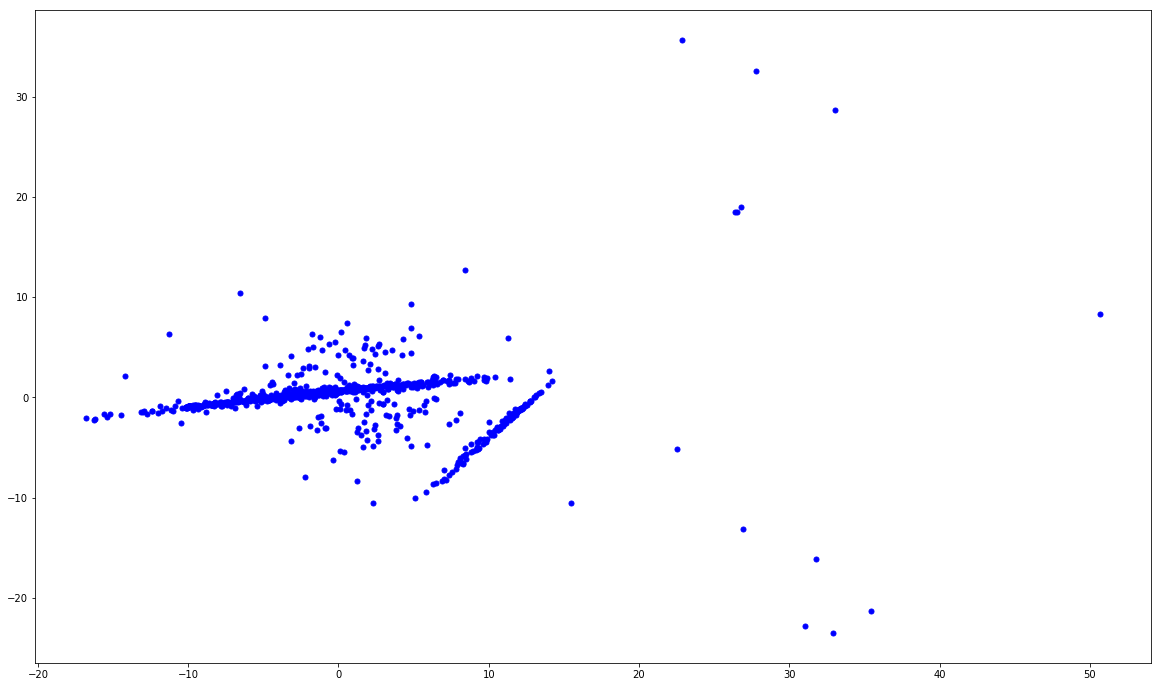

In [13]:
model = PCA(n_components=2)
model.fit(cluster_centers_df)
result = model.transform(cluster_centers_df)

mpl.rcParams['figure.figsize'] = (20.0, 12.0)
plt.plot(result[:,0],result[:,1],'bo', ms=5)
plt.show()

Cluster centers in two-dimensional source space

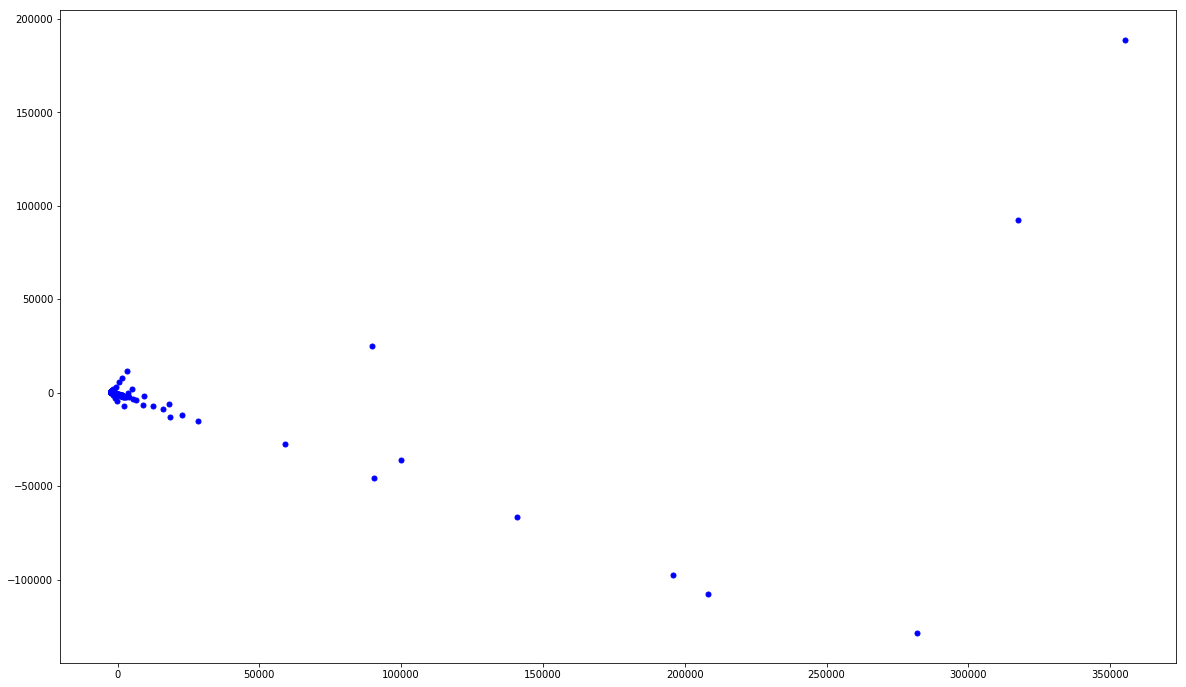

In [14]:
model = PCA(n_components=2)
model.fit(cluster_centers_df_exp)
result = model.transform(cluster_centers_df_exp)

mpl.rcParams['figure.figsize'] = (20.0, 12.0)
plt.plot(result[:,0],result[:,1],'bo', ms=5)
plt.show()

Paired plot of cluster centers in the logarithmic space

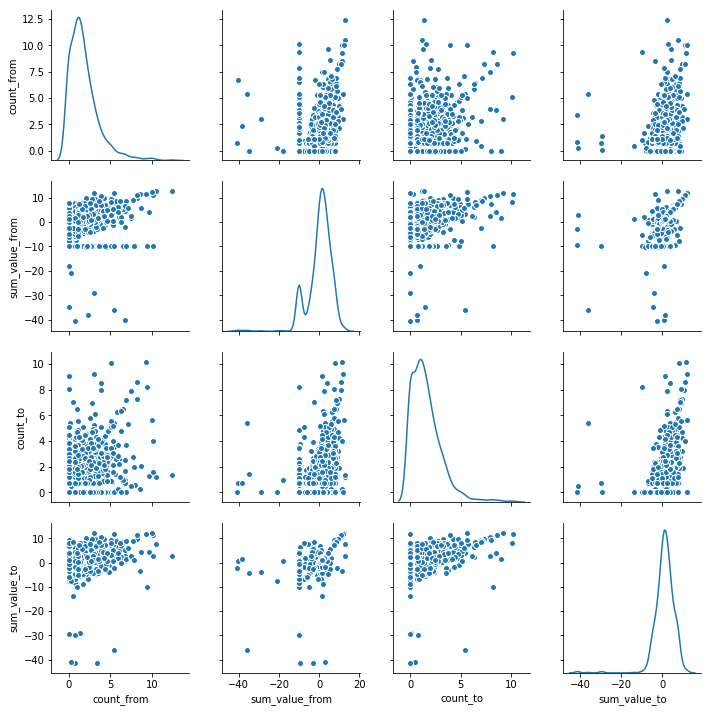

In [15]:
seaborn.pairplot(cluster_centers_df, diag_kind="kde")
plt.show()

Paired plot of cluster centers in the source space

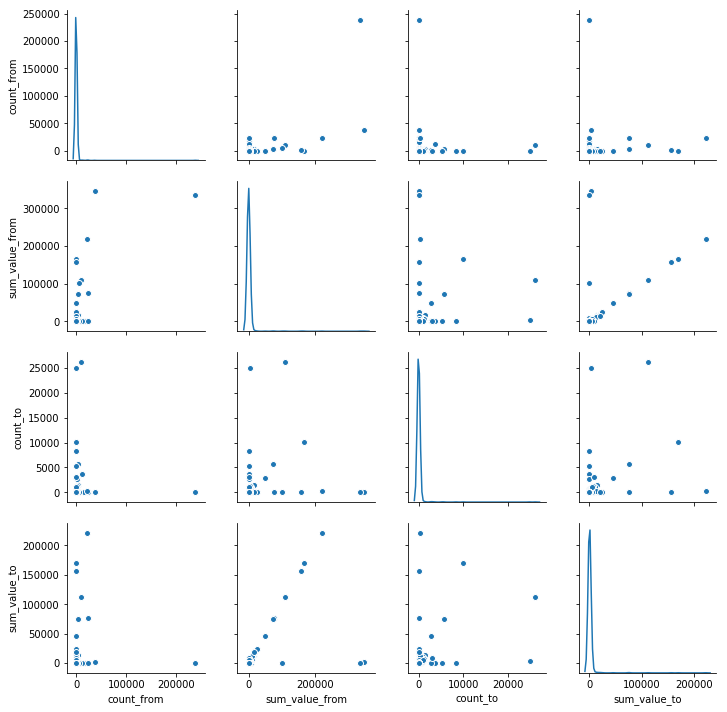

In [16]:
seaborn.pairplot(cluster_centers_df_exp, diag_kind="kde")
plt.show()

Agglomerative clustering 1000 cluster centers into 2, 3, 4, 5, 6, 8 clusters

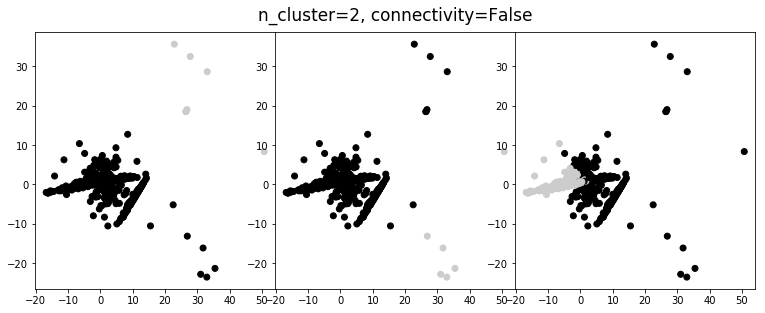

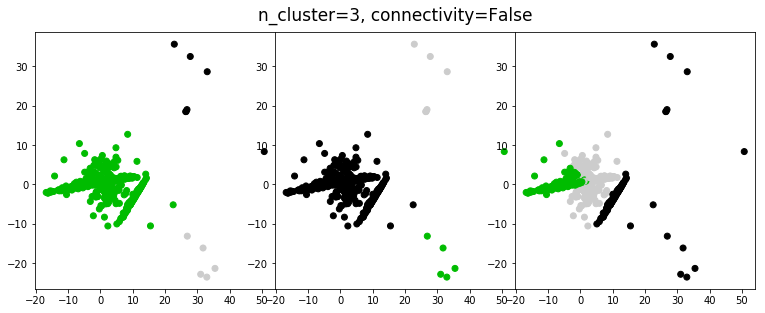

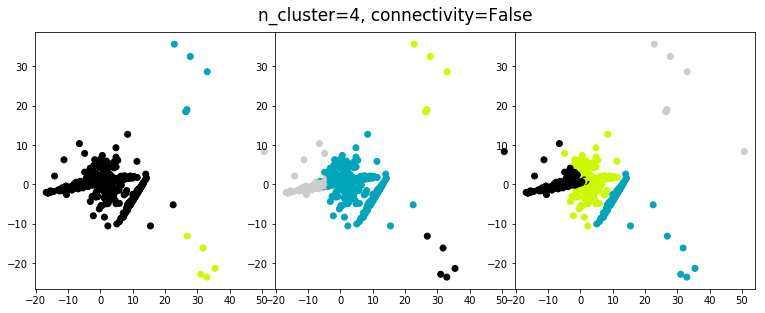

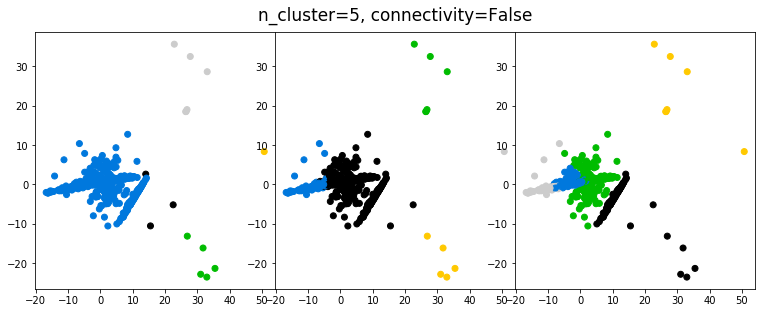

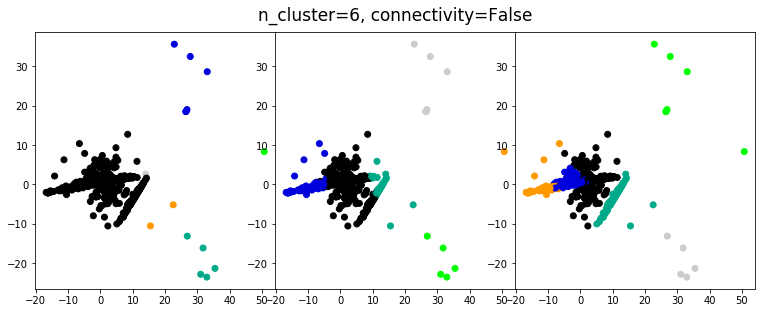

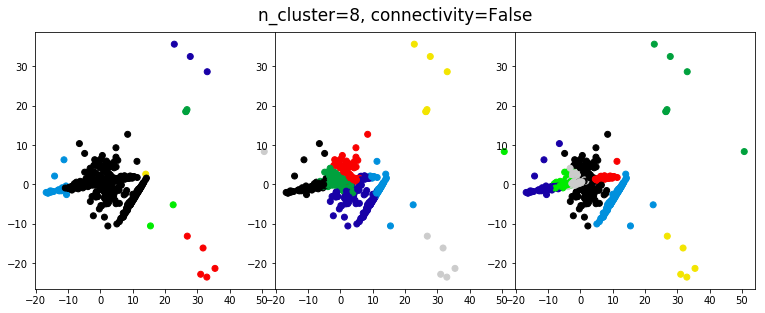

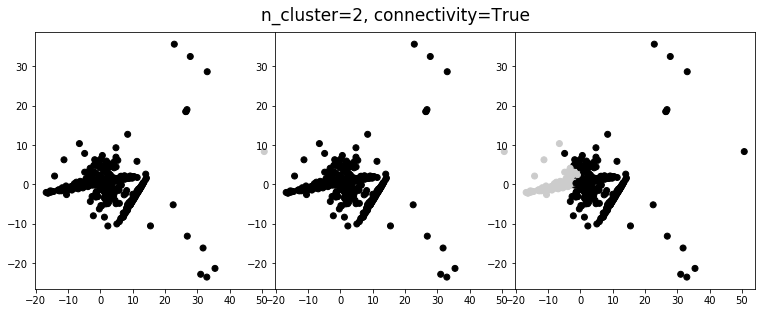

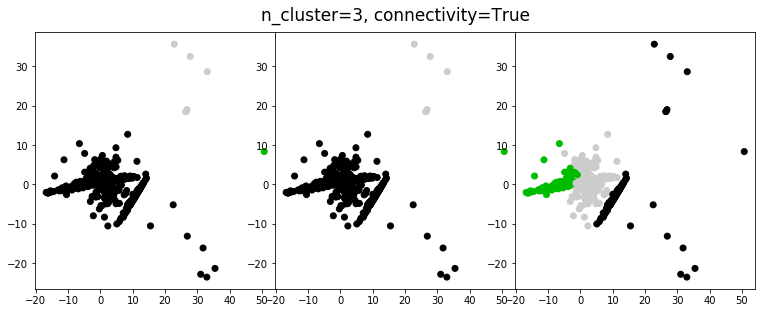

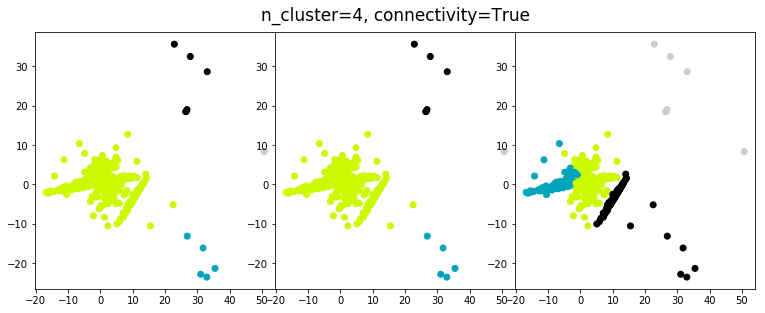

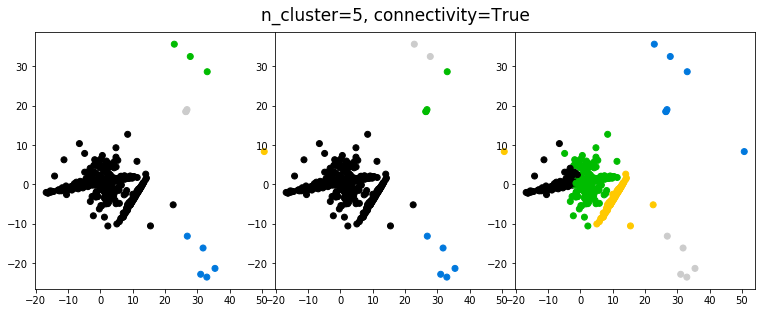

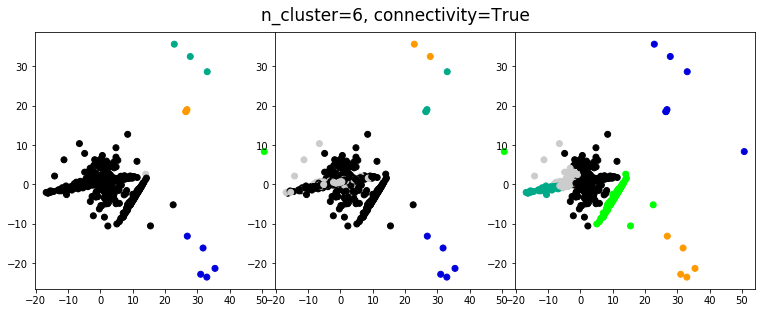

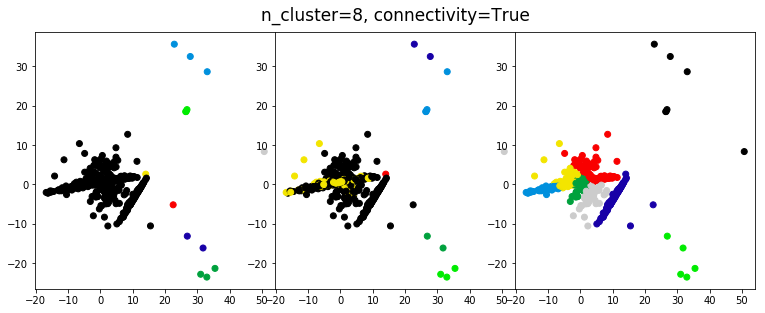

In [17]:
model_PCA = PCA(n_components=2)
model_PCA.fit(cluster_centers_df)
result = model_PCA.transform(cluster_centers_df)

knn_graph = kneighbors_graph(result, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (2, 3, 4, 5, 6, 8):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            model.fit(cluster_centers_df)
            plt.scatter(result[:, 0], result[:, 1], c=model.labels_,
                        cmap=plt.cm.spectral)
#             plt.title('')
#             plt.axis('')
#             plt.axis('')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()

Agglomerative clustering 1000 cluster centers into 8 clusters

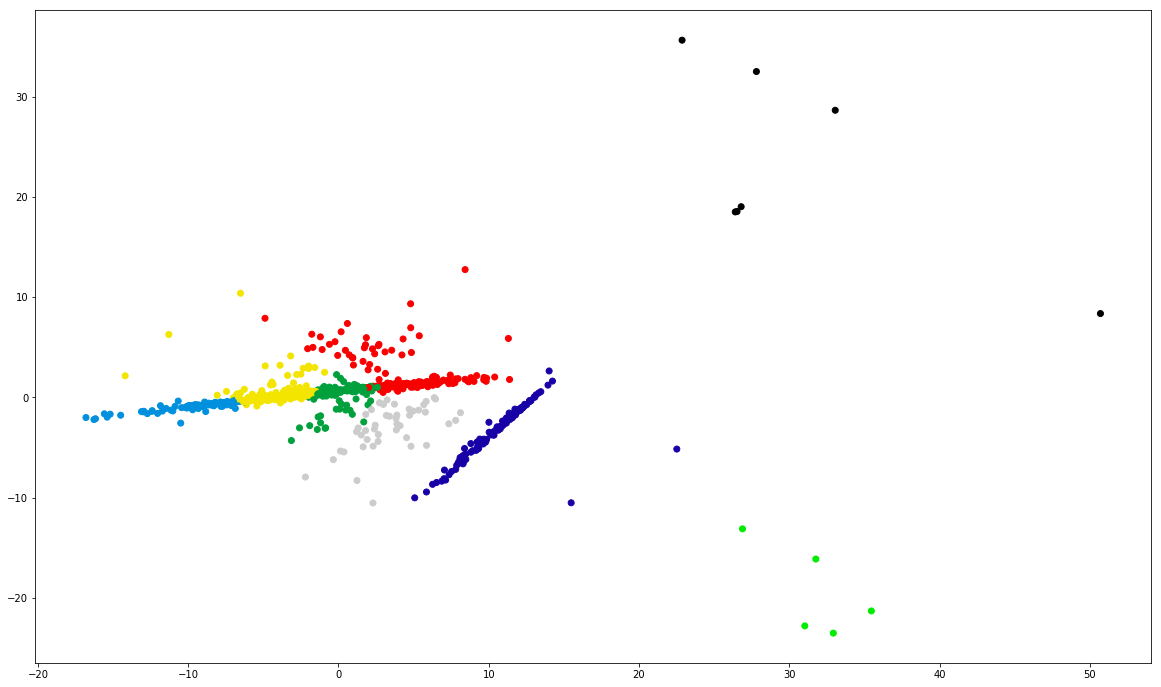

Cluster number  0  count: 7
      count_from  sum_value_from   count_to  sum_value_to  cluster_number
mean   36.806426        2.904865  32.256102  7.259493e-14             0.0
std    80.529619        7.663429  81.906352  9.635110e-14             0.0
75%    16.500000        0.025042   1.831249  1.500005e-13             0.0 

Cluster number  1  count: 110
       count_from  sum_value_from    count_to  sum_value_to  cluster_number
mean   402.347571        0.000048   37.628519     12.941421             1.0
std   2550.967982        0.000010  344.194476     69.445136             0.0
75%      9.190431        0.000048    3.814046      1.073896             1.0 

Cluster number  2  count: 144
       count_from  sum_value_from     count_to  sum_value_to  cluster_number
mean   501.990943     8177.952013   571.079494   8287.386175             2.0
std   2829.101506    28737.276716  3148.092540  29117.674539             0.0
75%     20.486224     3009.239733    35.110359   3006.701657             2.0 

In [18]:
model_PCA = PCA(n_components=2)
model_PCA.fit(cluster_centers_df)
result = model_PCA.transform(cluster_centers_df)


linkage = 'ward'
knn_graph = kneighbors_graph(result, 30, include_self=False)
connectivity = knn_graph
n_clusters = 8

model = AgglomerativeClustering(linkage=linkage,
                                connectivity=connectivity,
                                n_clusters=n_clusters)
model.fit(cluster_centers_df)
plt.scatter(result[:, 0], 
            result[:, 1], 
            c=model.labels_,
            cmap=plt.cm.spectral)
plt.show()

cluster_centers_df_exp.loc[:,'cluster_number'] = model.labels_

for i in range(n_clusters):
    print('Cluster number ',i,' count:',len(cluster_centers_df_exp[cluster_centers_df_exp['cluster_number']==i]))
    print(cluster_centers_df_exp[cluster_centers_df_exp['cluster_number']==i].describe().loc[['mean','std', '75%'],:],'\n')

Calculation of boarder for simple clussification desision tree

In [19]:
count_percentiles = [np.percentile(data['count_from']+data['count_to'],50),
                     np.percentile(data['count_from']+data['count_to'],95)]
value_percentiles = [np.percentile(data['sum_value_from']+data['sum_value_to'],50),
                     np.percentile(data['sum_value_from']+data['sum_value_to'],95)]
value_percentiles_by_count = []
value_percentiles_by_count_and_sum_value = []

for i in range(len(value_percentiles)+1):
    if i == 0: 
        data_temp_sum_value = data[data['count_from'] + data['count_to'] <= count_percentiles[i]]
    if i > 0 and i < len(value_percentiles):
        data_temp_sum_value = data[(data['count_from'] + data['count_to'] > count_percentiles[i-1]) & (data['count_from'] + data['count_to'] <= count_percentiles[i])]
    if i == len(value_percentiles):
        data_temp_sum_value = data[data['count_from'] + data['count_to'] > count_percentiles[i-1]]

    value_percentiles_by_count.append([np.percentile(data_temp_sum_value['sum_value_from']+data_temp_sum_value['sum_value_to'], 50),
                                       np.percentile(data_temp_sum_value['sum_value_from']+data_temp_sum_value['sum_value_to'], 95)])
    for j in range(len(value_percentiles_by_count[-1])):
        if j == 0: 
            data_temp = data_temp_sum_value[data_temp_sum_value['sum_value_from'] + data_temp_sum_value['sum_value_to'] <= value_percentiles_by_count[-1][j]]
        if j > 0 and j < len(value_percentiles):
            data_temp = data_temp_sum_value[(data_temp_sum_value['sum_value_from'] + data_temp_sum_value['sum_value_to'] > value_percentiles_by_count[-1][j-1]) & (data_temp_sum_value['sum_value_from'] + data_temp_sum_value['sum_value_to'] <= value_percentiles_by_count[-1][j])]
        if j == len(value_percentiles):
            data_temp = data_temp_sum_value[data_temp_sum_value['sum_value_from'] + data_temp_sum_value['sum_value_to'] > count_percentiles[j-1]]
        value_percentiles_by_count_and_sum_value.append(
            [(data_temp['percent_count_value_zero_from']+data_temp['percent_count_value_zero_to']).quantile(.5),
             (data_temp['percent_count_value_zero_from']+data_temp['percent_count_value_zero_to']).quantile(.95)])

print('Percentiles count txn by addresses 50% and 95%: ', count_percentiles, '\n')
print('Percentiles sum value by addresses 50% and 95%: ', value_percentiles, '\n')    
print('Percentiles value_percentiles_by_count by addresses 50% and 95%: ', value_percentiles_by_count, '\n')
print('Percentiles value_percentiles_by_count_and_sum_value by addresses 50% and 95%: ', value_percentiles_by_count_and_sum_value)

Percentiles count txn by addresses 50% and 95%:  [4.0, 20.0] 

Percentiles sum value by addresses 50% and 95%:  [5.98874, 6001.9986769999996] 

Percentiles value_percentiles_by_count by addresses 50% and 95%:  [[1.997200665, 79.031029633499514], [2001.9977949999998, 6001.99874], [22.303429900385105, 6001.9985806968116]] 

Percentiles value_percentiles_by_count_and_sum_value by addresses 50% and 95%:  [[0.0, 1.0], [0.0, 0.0], [0.0, 0.8333333333333334], [0.0, 0.0], [0.0, 0.9090909090909091], [0.0, 0.8769230769230769]]
